In [1]:
# importing all necessary modules
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.corpus import stopwords

In [ ]:
json_path = "../data/data.json"
data = pd.read_json(json_path)

In [ ]:
# Connection to database if want to 
'''
database_path = "../da_job_data.sqlite"

engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM da_data", conn)
'''

In [4]:
# Preview the Data
data.head()

,id,title,company_name,location,via,description,extensions,schedule_type,work_from_home,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,1,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",Contractor,TRUE,,,,"['qlik', 'power_bi', 'power_bi']"
1,2,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,,['excel']
2,3,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",Full-time,,,,,"['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],,,,,,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10497 non-null  int64 
 1   title                10497 non-null  object
 2   company_name         10497 non-null  object
 3   location             10497 non-null  object
 4   via                  10497 non-null  object
 5   description          10497 non-null  object
 6   extensions           10497 non-null  object
 7   schedule_type        10497 non-null  object
 8   work_from_home       10497 non-null  object
 9   salary_hourly        10497 non-null  object
 10  salary_yearly        10497 non-null  object
 11  salary_standardized  10497 non-null  object
 12  description_tokens   10497 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


In [6]:
data['salary_standardized'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
data['salary_standardized'] = data['salary_standardized'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10497 non-null  int64  
 1   title                10497 non-null  object 
 2   company_name         10497 non-null  object 
 3   location             10497 non-null  object 
 4   via                  10497 non-null  object 
 5   description          10497 non-null  object 
 6   extensions           10497 non-null  object 
 7   schedule_type        10497 non-null  object 
 8   work_from_home       10497 non-null  object 
 9   salary_hourly        10497 non-null  object 
 10  salary_yearly        10497 non-null  object 
 11  salary_standardized  2103 non-null   float64
 12  description_tokens   10497 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [8]:
# export data to json for app.py route /data to use for d3.js.
data.to_json('../data/data.json', orient='records')

In [9]:
# jobs EDA
data['title'].value_counts().head(10)

Data Analyst                                   1124
Senior Data Analyst                             398
Lead Data Analyst                               233
Sr. Data Analyst, Marketing Operations          203
Data Analyst II                                 196
Business Data Analyst                           136
Senior Data Analyst, Business Optimization       99
Data Scientist                                   97
Senior Performance Marketing (Data Analyst)      59
Junior Data Analyst                              59
Name: title, dtype: int64

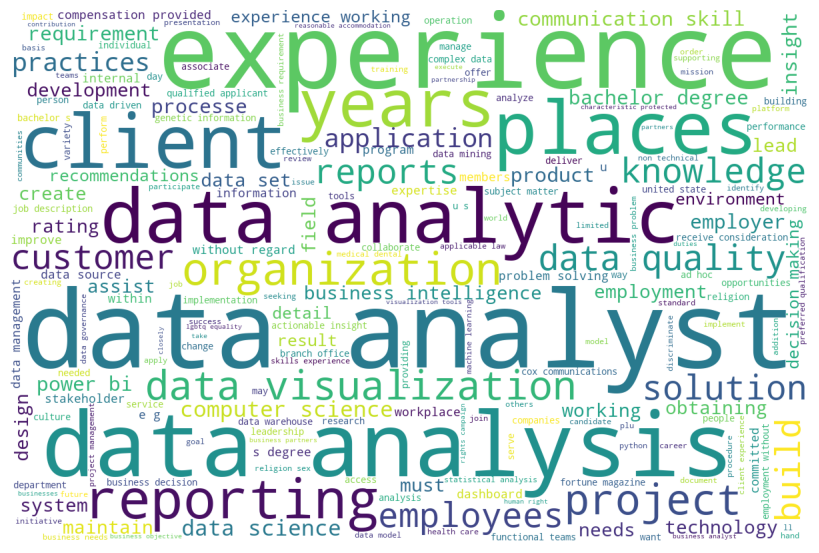

In [12]:
# Word cloud on description field
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["work", "ability", "support", "role", "sexual", "orientation", "responsible", "edward", "jones", "status", "support", "looking", "provide", "gender", "identity", \
                "report", "year", "race color", "equal", "opportunity", "team", "based", "able", "make", "focus", "drive", "employee", "develop", "ensure", "great", "place",\
                "race", "color", "partner", "need", "use", "understanding", "recommendation","national", "origin", "grow", "tool", \
                "help", "well", "will", "long", "term","national", "origin", "grow", "tool", "best", "practice", "company", "member", "understand", "one", \
                "meet", "salary", "range", "learn", "value","full", "time", "grow", "understand", "related", "position", "cross", "part"])
 
# iterate through the csv file
for val in data['description']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
# closing the database connection
#conn.close()